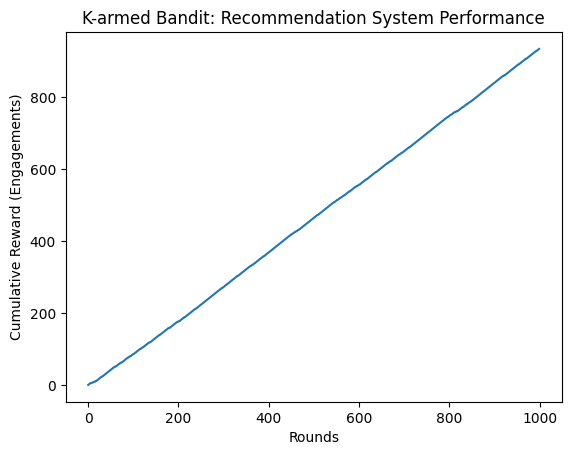

True rewards for each arm: [0.78387873 0.34345884 0.66378665 0.52385921 0.59327176 0.09287774
 0.9377796  0.98567615 0.09943571 0.38362403]
Estimated rewards for each arm: [0.8        0.55555556 0.63636364 0.42857143 0.75       0.
 0.90909091 0.98085586 0.         0.25      ]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class KArmBandit:
    def __init__(self, k, epsilon=0.1):
        self.k = k
        self.epsilon = epsilon
        self.q_true = np.random.uniform(0, 1, k)
        self.q_estimated = np.zeros(k)
        self.arm_counts = np.zeros(k)

    def get_reward(self, arm):
        reward = 1 if np.random.rand() < self.q_true[arm] else 0
        return reward

    def select_arm(self):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.k)
        else:
            return np.argmax(self.q_estimated)

    def update_estimates(self, arm, reward):
        self.arm_counts[arm] += 1
        self.q_estimated[arm] += (reward - self.q_estimated[arm]) / self.arm_counts[arm]

    def run(self, n_rounds):
        rewards = np.zeros(n_rounds)
        for round in range(n_rounds):
            arm = self.select_arm()
            reward = self.get_reward(arm)
            self.update_estimates(arm, reward)
            rewards[round] = reward
        return rewards

k = 10
n_rounds = 1000

bandit = KArmBandit(k)
rewards = bandit.run(n_rounds)

plt.plot(np.cumsum(rewards))
plt.xlabel('Rounds')
plt.ylabel('Cumulative Reward (Engagements)')
plt.title('K-armed Bandit: Recommendation System Performance')
plt.show()

print(f"True rewards for each arm: {bandit.q_true}")
print(f"Estimated rewards for each arm: {bandit.q_estimated}")


